In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score #rand без учёта пар в разных кластерах и разных классах
from sklearn.metrics import rand_score #попарное сравнение принадлежат ли пары к нужным кластерам
from sklearn.metrics import calinski_harabasz_score #дисперсия кластеров к дисперсии конкретного кластера, чем больше тем лучше 
from sklearn.metrics import davies_bouldin_score #схожесть между разными кластерами, чем меньше тем лучше

In [38]:
class K_means:
    def __init__(self, num_of_klusters, degree):
        self.degree = degree
        self.k = num_of_klusters
        self.klusters = []
    def __dist(self, x, y, degree):
        distance = 0
        for i in range(x.shape[0]):
            distance+=np.abs(x[i]-y[i])**degree
        return distance**(1/degree)
    def __initialize_random_centroids(self, X):
        centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for i in range(self.k):
            self.klusters.append(dict(centroid = centroids[i], objects = []))
    def __update_classes(self, X):
        for obj in X:
            distances = []
            for kluster in self.klusters:
                distances.append(self.__dist(obj, kluster["centroid"], self.degree))
            self.klusters[distances.index(min(distances))]["objects"].append(obj)
    def __update_centroids(self, X):
        for i in range(self.k):
            self.klusters[i]["centroid"] = np.mean(self.klusters[i]["objects"], axis=0)
    def fit(self, X, num_of_iterations):
        self.__initialize_random_centroids(X)
        for i in range(num_of_iterations):
            self.__update_classes(X)
            self.__update_centroids(X)
    def predict(self, X):
        predictions = []
        for st in X:
            distances = []
            for kluster in self.klusters:
                distances.append(self.__dist(st, kluster["centroid"], self.degree))
            predictions.append(distances.index(min(distances)))
        return predictions

In [39]:
X, y = make_classification(n_samples=1000, n_classes = 2, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=34)

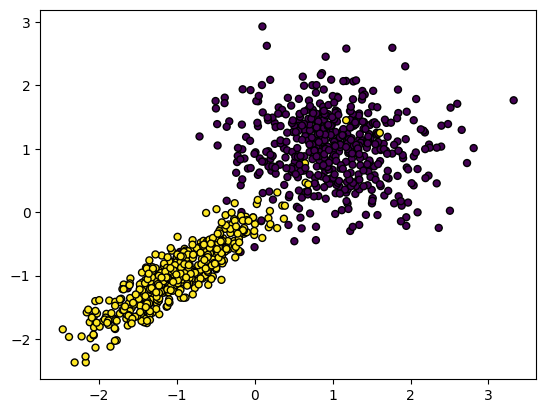

In [40]:
plt.scatter(X[:,0], X[:,1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [64]:
md = K_means(2, 1)

In [65]:
md.fit(X, 10)
pred = md.predict(X)
centroids = []


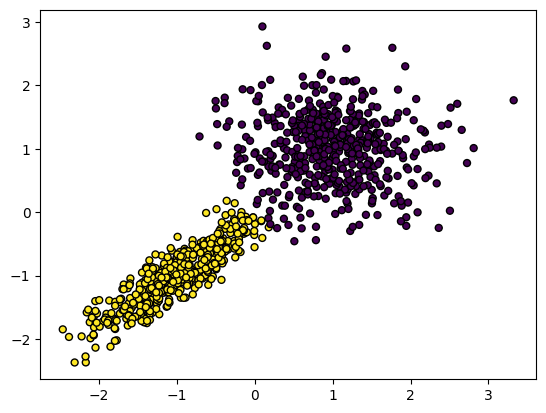

In [66]:
plt.scatter(X[:,0], X[:,1], marker="o", c=pred, s=25, edgecolor="k")
plt.show()

In [45]:
print("Rand", rand_score(y, pred))
print("Jaccard", jaccard_score(y, pred))
print("Calinsky_harabasz", calinski_harabasz_score(X, pred))
print("davies_bouldin", davies_bouldin_score(X, pred))

Rand 0.955013013013013
Jaccard 0.9546351084812623
Calinsky_harabasz 3377.8696286659374
davies_bouldin 0.46417364917499226


In [46]:
X1, y1 = make_classification(n_samples=1000, n_classes = 3, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=125)

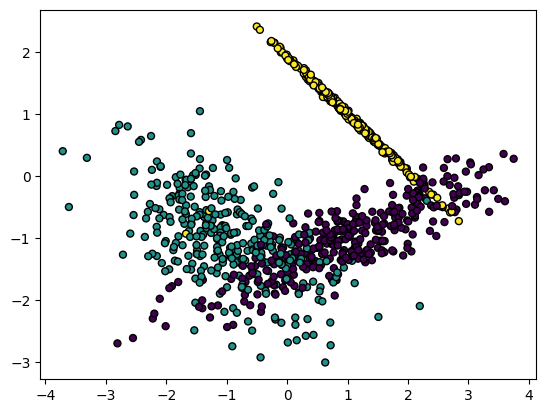

In [47]:
plt.scatter(X1[:,0], X1[:,1], marker="o", c=y1, s=25, edgecolor="k")
plt.show()

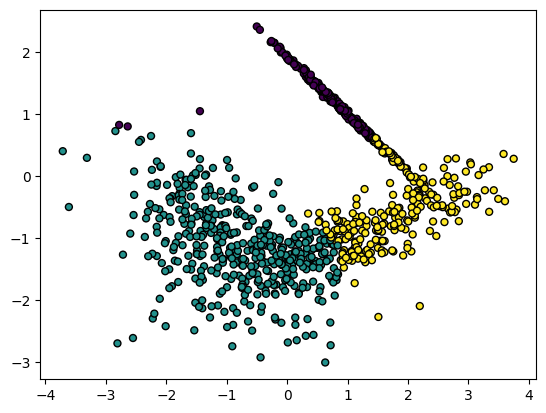

In [48]:
md = K_means(3, 1)
md.fit(X1, 10)
pred = md.predict(X1)
plt.scatter(X1[:,0], X1[:,1], marker="o", c=pred, s=25, edgecolor="k")
plt.show()

In [49]:
X2, y2 = make_classification(n_samples=1000, n_classes = 4, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=11)

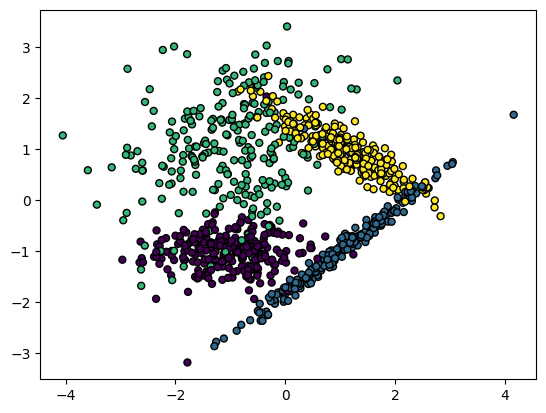

In [51]:
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor="k")
plt.show()

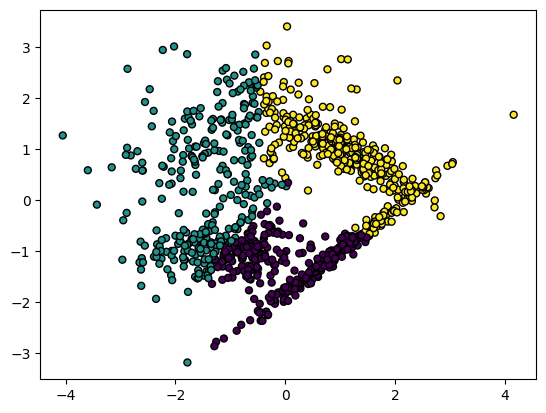

In [50]:
md = K_means(3, 1)
md.fit(X2, 10)
pred = md.predict(X2)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=pred, s=25, edgecolor="k")
plt.show()